# CIFAR 100

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras 
from keras.layers import Dense

## Import Datasets

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()
print(f'$ x_train: {x_train.shape}')
print(f'$ y_train: {y_train.shape}')
print(f'$ x_test: {x_test.shape}')
print(f'$ y_test: {y_test.shape}')

$ x_train: (50000, 32, 32, 3)
$ y_train: (50000, 1)
$ x_test: (10000, 32, 32, 3)
$ y_test: (10000, 1)


## Image Show

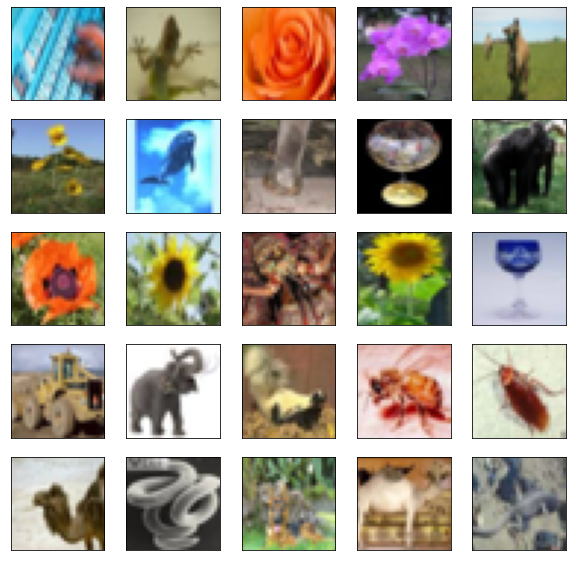

In [3]:
plt.figure(figsize=(10,10))
for idx, img in enumerate(np.random.randint(0, 9999, 25)):
    plt.subplot(5, 5, idx+1)
    plt.imshow(x_train[img])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
plt.show()

## Process Data

### Normalize Data

In [4]:
x_train, x_test = x_train/255, x_test/255

### Reshape Data

In [5]:
dim2 = 32*32*3
x_train = x_train.reshape(len(x_train), dim2)
x_test = x_test.reshape(len(x_test), dim2)

## Initialize Variables

### One-Hot Encoding

In [6]:
# One-hot Encoding
y_test = pd.get_dummies(i for i in y_test.T[0])
y_train = pd.get_dummies(i for i in y_train.T[0])

### Weight && Bias

In [7]:
W = np.full((3072, 1), 0.0)
b = np.full((100, 1), 0.0)

### Hyperparameter

In [8]:
learning_rate = 0.001
batch_size = 500
epochs = 100

## Build Model

In [17]:
model = keras.Sequential()

### Add Layers

In [18]:
print(f'$ x_train: {x_train.shape}')
print(f'$ y_train: {y_train.shape}')
print(f'$ x_test: {x_test.shape}')
print(f'$ y_test: {y_test.shape}')

$ x_train: (50000, 3072)
$ y_train: (50000, 100)
$ x_test: (10000, 3072)
$ y_test: (10000, 100)


#### ReLU

In [19]:
model.add(Dense(3072, activation='relu', input_shape=(3072, )))
model.add(Dense(3072, activation='relu', input_shape=(3072, )))
model.add(Dense(3072, activation='relu', input_shape=(3072, )))
model.add(Dense(128, activation='relu', input_shape=(3072, )))

#### Softmax

In [20]:
model.add(Dense(100, activation='softmax'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 3072)              9440256   
                                                                 
 dense_9 (Dense)             (None, 3072)              9440256   
                                                                 
 dense_10 (Dense)            (None, 3072)              9440256   
                                                                 
 dense_11 (Dense)            (None, 128)               393344    
                                                                 
 dense_12 (Dense)            (None, 100)               12900     
                                                                 
Total params: 28,727,012
Trainable params: 28,727,012
Non-trainable params: 0
_________________________________________________________________


### Model Compile

In [22]:
adam = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Model Train

In [23]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=10, verbose=2)

Epoch 1/10
100/100 - 92s - loss: 4.6772 - accuracy: 0.0089 - 92s/epoch - 921ms/step
Epoch 2/10
100/100 - 81s - loss: 4.6053 - accuracy: 0.0095 - 81s/epoch - 808ms/step
Epoch 3/10
100/100 - 114s - loss: 4.6054 - accuracy: 0.0088 - 114s/epoch - 1s/step
Epoch 4/10
100/100 - 107s - loss: 4.6054 - accuracy: 0.0090 - 107s/epoch - 1s/step
Epoch 5/10
100/100 - 97s - loss: 4.6053 - accuracy: 0.0091 - 97s/epoch - 969ms/step
Epoch 6/10
100/100 - 101s - loss: 4.6053 - accuracy: 0.0081 - 101s/epoch - 1s/step
Epoch 7/10
100/100 - 102s - loss: 4.6054 - accuracy: 0.0088 - 102s/epoch - 1s/step
Epoch 8/10
100/100 - 85s - loss: 4.6053 - accuracy: 0.0091 - 85s/epoch - 847ms/step
Epoch 9/10
100/100 - 89s - loss: 4.6053 - accuracy: 0.0088 - 89s/epoch - 895ms/step
Epoch 10/10
100/100 - 98s - loss: 4.6054 - accuracy: 0.0086 - 98s/epoch - 976ms/step


## Predict

In [24]:
pred = model.predict(x_test)

313/313 [==============================] - 10s 32ms/step


## Test

In [25]:
count = 0

for idx, i in enumerate(pred):
    if np.argmax(y_test.T[idx]) == np.argmax(i):
        count += 1

In [48]:
print(len(model.layers[0].get_weights()[0]))
print(len(model.layers[2].get_weights()[0][0]))
weight = model.layers[2].get_weights()[0][0]
weight_new = weight.reshape(32,32,3)
# weights = model.layers[0].get_weights()[0]
# weight_pic = weights.reshape(32, 32, 3)

3072
3072


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 720x720 with 0 Axes>

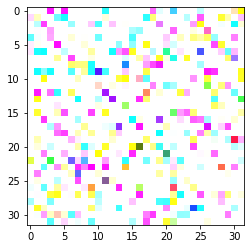

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


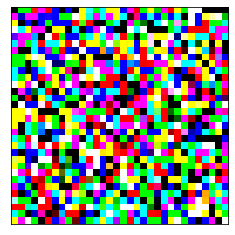

In [53]:
plt.figure(figsize=(10,10))
plt.subplots(1, 1)
plt.imshow(abs(weight_new*255))
plt.show()
plt.imshow((weight_new*255))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [44]:
print(weight_new.shape)

(32, 32, 3)
